# Qiskit Demo

## Setup

### Installing Qiskit

In [23]:
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Importing libraries

In [24]:
from qiskit import QuantumCircuit, Aer
from qiskit.tools.visualization import plot_histogram

## Building Circuit

### Circuit initialisation

For the simplest programs with very few qubits, it is useful to represent this process in a diagram known as a circuit diagram.

These have inputs on the left, outputs on the right, and operations represented by arcane symbols in between.

These operations are called gates: [Quantum Logic Gates](https://en.wikipedia.org/wiki/Quantum_logic_gate)

In a circuit, we typically need to do three jobs:

* Encode the input
* Do some actual computation
* Extract an output

In [25]:
# creating circuit with 2 qubits
qc = QuantumCircuit(2)

### H-gate

The Hadamard gate (H-gate) allows us to move away from the poles of the Bloch sphere and create a superposition of $|0⟩$ and $|1⟩$.

This can be thought of as a rotation around the Bloch vector $[1,0,1]$. It has the matrix: $H = \frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}$

In [26]:
# adding an Hadamard gate on the first qubit q0
qc.h(0)

### CNOT

Conditional gate that performs an X-gate on the second qubit *target*, if the state of the first qubit *control* is $|1⟩$.

An X-gate is represented by the matrix: $X = 
\begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix}$

In [27]:
# adding a CNOT on the second qubit q1 controlled by q0
qc.cx(0,1)

### Measurement

Each measurement tells a specific qubit to give an output to a specific output bit. The following command adds a measurement to each qubit in the circuit in order to extract the outputs of the quantum circuit.

In [28]:
# adding measurements to the circuit
qc.measure_all()

## Circuit Results

### Circuit Diagram

In [29]:
# drawing the circuit diagram
qc.draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

### Circuit Simulation

In [30]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc).result()

### Simulation Results

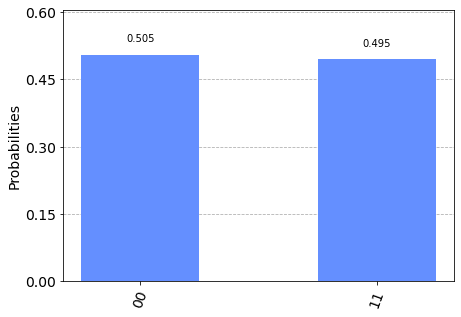

In [31]:
counts = result.get_counts()
plot_histogram(counts)